In [2]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import pandas as pd
import numpy as np


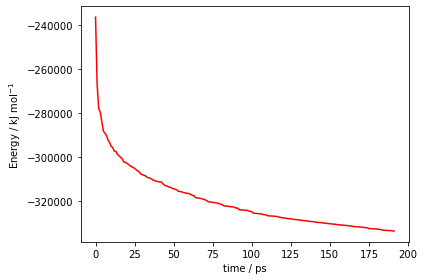

In [3]:
potential_file = "../minimisation/potential.xvg"
reader = mda.auxiliary.XVG.XVGReader(potential_file)
print(reader)
time = [step.data[0] for step in reader]
potential = [step.data[1] for step in reader]
plt.plot(time, potential, c="red")
plt.xlabel("time / ps")
plt.ylabel(r"Energy / kJ mol$^{-1}$")
plt.tight_layout()
plt.savefig("../plots/potential.png")

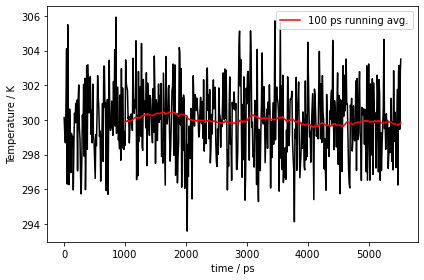

In [20]:
temp_file = "../nvt/temperature.xvg"
reader = mda.auxiliary.XVG.XVGReader(temp_file)
print(reader)
time = [step.data[0] for step in reader]
temperature = [step.data[1] for step in reader]
temperature_df = pd.DataFrame({"time": time, "temperature": temperature})
running_avg = temperature_df["temperature"].rolling(window=100).mean().to_numpy()
avg_temperature = np.where(np.isnan(running_avg), 0, running_avg)
plt.plot(time, temperature, c="black")
plt.plot(time, running_avg, c="red", label = "100 ps running avg.")
plt.xlabel("time / ps")
plt.ylabel("Temperature / K")
plt.tight_layout()
plt.label()
plt.savefig("../plots/temperature.png", dpi=1000, transparent=True)

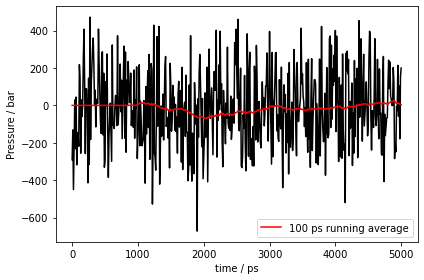

In [24]:
pressure_file = "../npt/pressure.xvg"
reader = mda.auxiliary.XVG.XVGReader(pressure_file)
print(reader)
time = [step.data[0] for step in reader]
pressure = [step.data[1] for step in reader]
pressure_df = pd.DataFrame({"time": time, "pressure": pressure})
running_avg = pressure_df["pressure"].rolling(window=100).mean().to_numpy()
avg_pressure = np.where(np.isnan(running_avg), 0, running_avg)
plt.plot(time, pressure, c="black")
plt.plot(time, avg_pressure, c="red", label="100 ps running average")
plt.xlabel("time / ps")
plt.ylabel("Pressure / bar")
plt.label()
plt.tight_layout()
plt.savefig("../plots/pressure.png", dpi=1000, transparent=True)

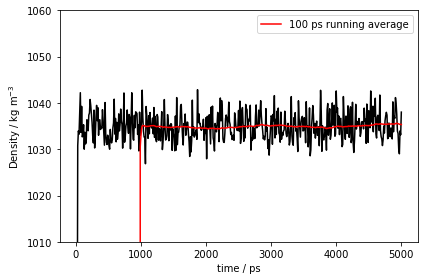

In [29]:
density_file = "../npt/density.xvg"
reader = mda.auxiliary.XVG.XVGReader(density_file)
print(reader)
time = [step.data[0] for step in reader]
density = [step.data[1] for step in reader]
density_df = pd.DataFrame({"time": time, "density": density})
running_avg = density_df["density"].rolling(window=100).mean().to_numpy()
avg_density = np.where(np.isnan(running_avg), 0, running_avg)
plt.plot(time, density, c="black")
plt.plot(time, avg_density, c="red", label="100 ps running average")
plt.xlabel("time / ps")
plt.ylabel(r"Density / kg m$^{-3}$")
plt.ylim(1010, 1060)
plt.label()
plt.tight_layout()
plt.savefig("../plots/density.png", dpi=1000, transparent=True)

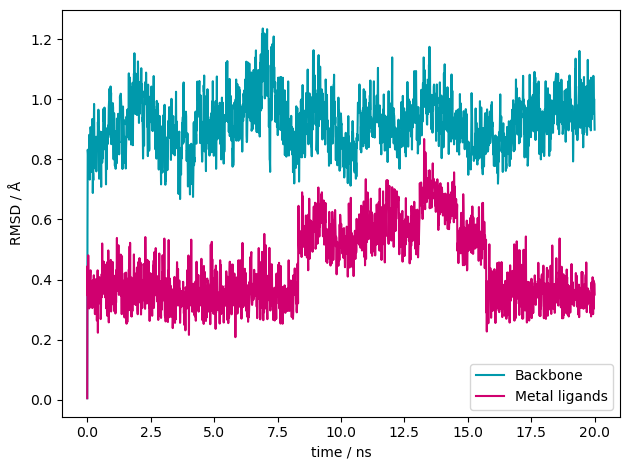

In [12]:
rmsd_file = "../production/rmsd.xvg"
reader = mda.auxiliary.XVG.XVGReader(rmsd_file)
time = [step.data[0] for step in reader]
rmsd = [step.data[1]*10 for step in reader]
rmsd_lig_file = "../production/rmsd_lig.xvg"
reader = mda.auxiliary.XVG.XVGReader(rmsd_lig_file)
time_lig = [step.data[0] for step in reader]
rmsd_lig = [step.data[1]*10 for step in reader]
plt.plot(time, rmsd, c="#0099AB", label="Backbone")
plt.plot(time_lig, rmsd_lig, c="#D0006F", label="Metal ligands")
plt.xlabel("time / ns")
plt.ylabel("RMSD / Å")
plt.label()
plt.tight_layout()
plt.savefig("../plots/rmsd.png", dpi=1000, transparent=True)

bond mol.83.NE2 mol.231.ZN HD1
bond mol.85.ND1 mol.231.ZN HE1
bond mol.87.OD2 mol.232.ZN AP1
bond mol.148.NE2 mol.231.ZN HD2
bond mol.167.SG mol.232.ZN CS1
bond mol.209.NE2 mol.232.ZN HD3
bond mol.231.ZN mol.233.O07 PT1
bond mol.232.ZN mol.233.O08 PT1

In [20]:
universe = mda.Universe("../production/md.pdb", "../production/md_nopbc.xtc")
n_frames = universe.trajectory.n_frames
hd1, hd2, he1 = [], [], []
ap1, cs1, hd3 = [], [], []
pt_zn1, pt_zn2 = [], []
for frame in range(n_frames):
    universe.trajectory[frame]
    zn1 = universe.select_atoms("resname ZN1 and name ZN")
    h3 = [universe.select_atoms("resname HD1 and name NE2"), 
          universe.select_atoms("resname HD2 and name NE2"), 
          universe.select_atoms("resname HE1 and name ND1")]
    zn2 = universe.select_atoms("resname ZN2 and name ZN")
    dch = [universe.select_atoms("resname AP1 and name OD2"),
           universe.select_atoms("resname CS1 and name SG"),
           universe.select_atoms("resname HD3 and name NE2")]
    ligand = [universe.select_atoms("resname PT1 and name O07"),
              universe.select_atoms("resname PT1 and name O08")]
    temp = zn1 + h3[0]
    hd1.append(temp.bond.length())
    temp = zn1 + h3[1]
    hd2.append(temp.bond.length())
    temp = zn1 + h3[2]
    he1.append(temp.bond.length())
    temp = zn1 + ligand[0]
    pt_zn1.append(temp.bond.length())
    temp = zn2 + dch[0]
    ap1.append(temp.bond.length())
    temp = zn2 + dch[1]
    cs1.append(temp.bond.length())
    temp = zn2 + dch[2]
    hd3.append(temp.bond.length())
    temp = zn2 + ligand[1]
    pt_zn2.append(temp.bond.length())

    # group1 = hydroxide.select_atoms(f"id {hydroxide_atoms[0]} or id {hydroxide_atoms[1]}")
    # group2 = hydroxide.select_atoms(f"id {hydroxide_atoms[2]} or id {hydroxide_atoms[3]}")
    # length_1.append(group1.bond.length())
    # length_2.append(group2.bond.length())

In [24]:
time = [universe.trajectory[frame].time / 1000 for frame in range(n_frames)]

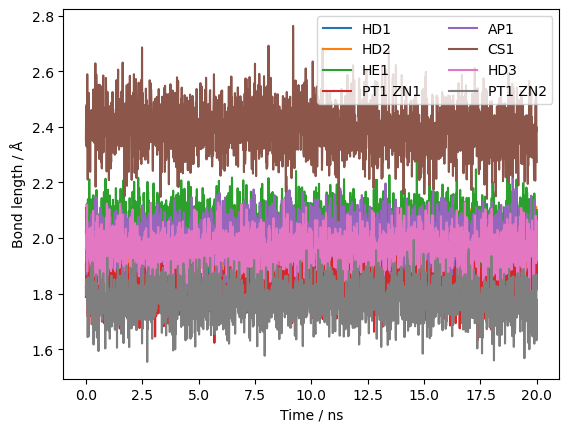

In [31]:
plt.plot(time, hd1, label="HD1")
plt.plot(time, hd2, label="HD2")
plt.plot(time, he1, label="HE1")
plt.plot(time, pt_zn1, label="PT1 ZN1")
plt.plot(time, ap1, label="AP1")
plt.plot(time, cs1, label="CS1")
plt.plot(time, hd3, label="HD3")
plt.plot(time, pt_zn2, label="PT1 ZN2")
plt.legend(ncol=2)
plt.xlabel("Time / ns")
plt.ylabel("Bond length / Å")
plt.savefig("../plots/bond_length.png", dpi=1000, transparent=True)

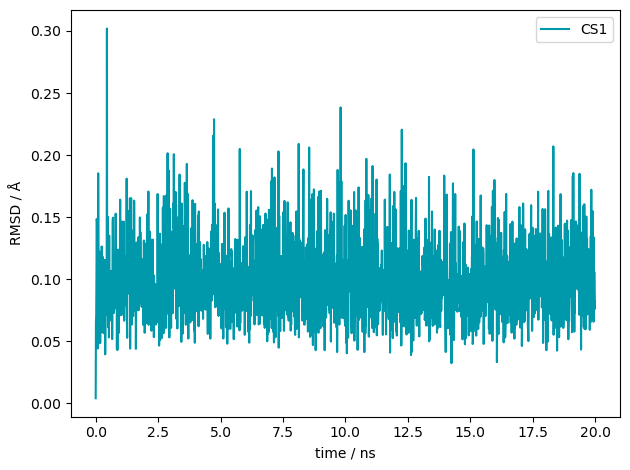

In [33]:
rmsd_file = "../production/cs1_rmsd.xvg"
reader = mda.auxiliary.XVG.XVGReader(rmsd_file)
time = [step.data[0] for step in reader]
rmsd = [step.data[1]*10 for step in reader]

plt.plot(time, rmsd, c="#0099AB", label="CS1")
plt.xlabel("time / ns")
plt.ylabel("RMSD / Å")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/cs1_rmsd.png", dpi=1000, transparent=True)

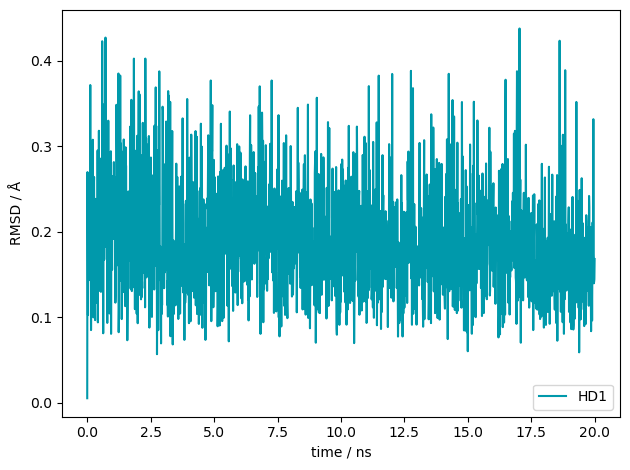

In [39]:
rmsd_file = "../production/hd1_rmsd.xvg"
reader = mda.auxiliary.XVG.XVGReader(rmsd_file)
time = [step.data[0] for step in reader]
rmsd = [step.data[1]*10 for step in reader]

plt.plot(time, rmsd, c="#0099AB", label="HD1")
plt.xlabel("time / ns")
plt.ylabel("RMSD / Å")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/hd1_rmsd.png", dpi=1000, transparent=True)

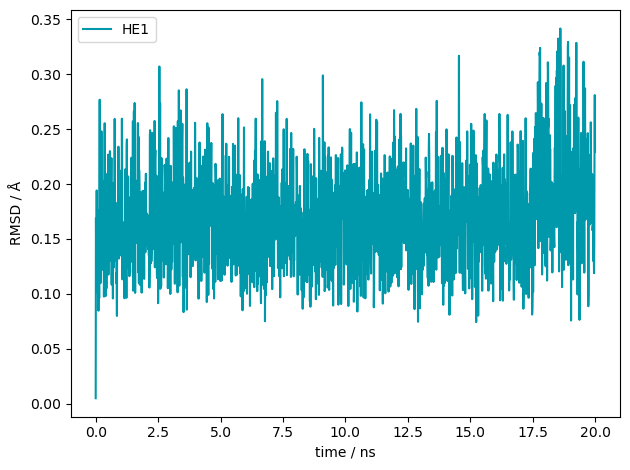

In [38]:
rmsd_file = "../production/he1_rmsd.xvg"
reader = mda.auxiliary.XVG.XVGReader(rmsd_file)
time = [step.data[0] for step in reader]
rmsd = [step.data[1]*10 for step in reader]

plt.plot(time, rmsd, c="#0099AB", label="HE1")
plt.xlabel("time / ns")
plt.ylabel("RMSD / Å")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/he1_rmsd.png", dpi=1000, transparent=True)

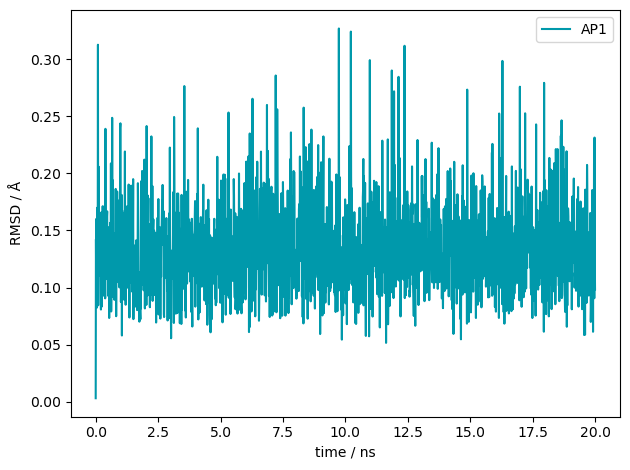

In [37]:
rmsd_file = "../production/ap1_rmsd.xvg"
reader = mda.auxiliary.XVG.XVGReader(rmsd_file)
time = [step.data[0] for step in reader]
rmsd = [step.data[1]*10 for step in reader]
plt.plot(time, rmsd, c="#0099AB", label="AP1")
plt.xlabel("time / ns")
plt.ylabel("RMSD / Å")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/ap1_rmsd.png", dpi=1000, transparent=True)

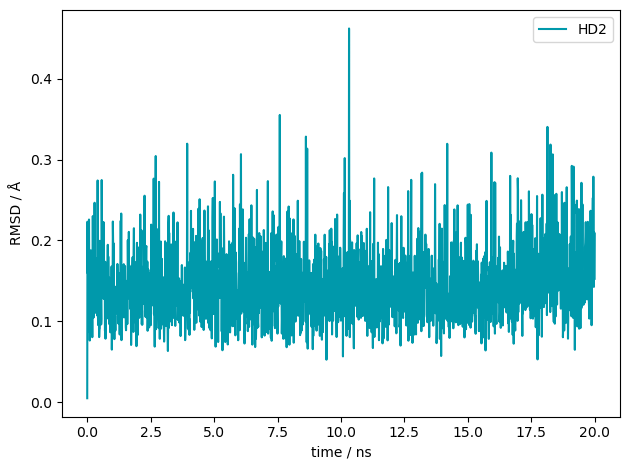

In [40]:
rmsd_file = "../production/hd2_rmsd.xvg"
reader = mda.auxiliary.XVG.XVGReader(rmsd_file)
time = [step.data[0] for step in reader]
rmsd = [step.data[1]*10 for step in reader]

plt.plot(time, rmsd, c="#0099AB", label="HD2")
plt.xlabel("time / ns")
plt.ylabel("RMSD / Å")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/hd2_rmsd.png", dpi=1000, transparent=True)

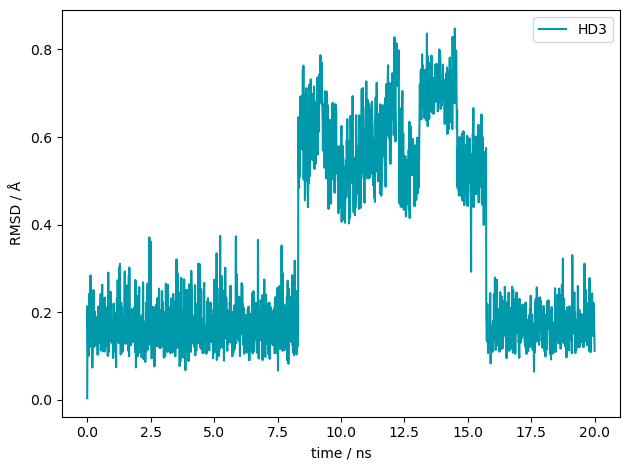

In [41]:
rmsd_file = "../production/hd3_rmsd.xvg"
reader = mda.auxiliary.XVG.XVGReader(rmsd_file)
time = [step.data[0] for step in reader]
rmsd = [step.data[1]*10 for step in reader]

plt.plot(time, rmsd, c="#0099AB", label="HD3")
plt.xlabel("time / ns")
plt.ylabel("RMSD / Å")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/hd3_rmsd.png", dpi=1000, transparent=True)